# Exploring both tracks from both channels in Napari overlayed 
1. **Napari Visualisation**
2. **Amplitude over time of selected tracks**

In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from laptrack import LapTrack
from laptrack import datasets
import napari
from skimage import io

In [2]:
##loading spots 
# Assuming 'your_file.pkl' is the name of your pickle file
file_path_c2 = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_c2.pkl'
file_path_c3 = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_c3.pkl'

# Read the pickle file into a Pandas DataFrame
c2_track_df = pd.read_pickle(file_path_c2)
c3_track_df = pd.read_pickle(file_path_c3)


For Channel 2 filter out tracks which are present in 8 frames 

For Channel 3 filter out tracks which are present in 9 frames 

In [3]:
# Find the count of each tree_id
c2_tree_id_counts =  c2_track_df['track_id'].value_counts()

# Get the tree_ids that have occurred more than 8 times
c2_selected_tree_ids = c2_tree_id_counts[c2_tree_id_counts > 8].index

# Filter the DataFrame to get rows with the selected tree_ids
c2_filtered_df = c2_track_df[c2_track_df['track_id'].isin(c2_selected_tree_ids)]
c2_filtered_df = c2_filtered_df.reset_index()

# Print the filtered DataFrame
#c2_filtered_df.head()

In [4]:
# Find the count of each tree_id
c3_tree_id_counts =  c3_track_df['track_id'].value_counts()

# Get the tree_ids that have occurred more than 8 times
c3_selected_tree_ids = c3_tree_id_counts[c3_tree_id_counts > 9].index

# Filter the DataFrame to get rows with the selected tree_ids
c3_filtered_df = c3_track_df[c3_track_df['track_id'].isin(c3_selected_tree_ids)]
c3_filtered_df = c3_filtered_df.reset_index()

# Print the filtered DataFrame
#c3_filtered_df.head()

# NAPARI VISUALISATION

In [5]:
# Create a napari viewer
viewer = napari.Viewer()

# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path_c3 = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel_3.tif'
file_path_c2 = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel_2.tif'

# Load the TIFF file using skimage
raw_image_c3 = io.imread(file_path_c3)
raw_image_c2 = io.imread(file_path_c2)

# Add the 4D stack to the viewer
layer_raw_c3 = viewer.add_image(raw_image_c3)
layer_raw_c2 = viewer.add_image(raw_image_c2)

In [6]:
layer_raw_c3.bounding_box.visible = True
layer_raw_c2.bounding_box.visible = True

**Add filtered tracks from both channel 2 & channel 3**

In [7]:
viewer.add_tracks(c3_filtered_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = ' filtered tracks Channel 3')
viewer.add_tracks(c2_filtered_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = 'filtered tracks Channel 2')

<Tracks layer 'filtered tracks Channel 2' at 0x7fd4123695d0>

**Add filtered points for which tracks are being displayed**

In [8]:
points_layer = viewer.add_points(c3_filtered_df[["frame", "mu_z", "mu_y", "mu_x"]], size=2,
                                name = 'filtered points channel 3', face_color = 'red', symbol = 'o')
points_layer = viewer.add_points(c2_filtered_df[["frame", "mu_z", "mu_y", "mu_x"]], size=2,
                                name = 'filtered points channel 2', face_color = 'green', symbol = 'o')

**Add all points for channel 2 and channel 3**

In [9]:
c3_track_df = c3_track_df.reset_index()
c2_track_df = c2_track_df.reset_index()

In [10]:
points_layer = viewer.add_points(c3_track_df[["frame", "mu_z", "mu_y", "mu_x"]], size=2,
                                name = 'all points channel 3', face_color = 'red', symbol = 'ring')
points_layer = viewer.add_points(c2_track_df[["frame", "mu_z", "mu_y", "mu_x"]], size=2,
                                name = 'all points channel 2', face_color = 'yellow', symbol = 'ring')

**Add all tracks for channel 2 and channel 3**

In [11]:
viewer.add_tracks(c3_track_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = 'all tracks Channel 3')
viewer.add_tracks(c2_track_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = 'all tracks Channel 2')

<Tracks layer 'all tracks Channel 2' at 0x7fd40bdc61a0>

1   HIToolbox                           0x00007ff823c38726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff823c382b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff823ba7cd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff823c38173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff81d7094b7 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff81d55e165 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   AppKit                              0x00007ff81dfaca40 -[_NSFullScreenSpace(PresentationInstance) activateFullScreenPresentationOptions] + 207
8   AppKit                              0x00007ff81ddff848 -[_NSEnterFullScreenTransitionController _doSucceededToEnterFullScreen] + 721


1   HIToolbox                           0x00007ff823c38726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff823c01638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff81eea774d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81f1ba04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81f1b9f71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff81a0267fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff81a027a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff81a0347b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff81a0343f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff823c38726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff823c01638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff81eea774d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81f1ba04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81f1b9f71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff81a0267fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff81a027a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff81a0347b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff81a0343f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

Manually Identified possible cme pairs 
track pairs 
1. channel 3 (336) channel 2 (292) (looks like cme site)
2. channel 3 (319) channel 2 (273) (looks like cme site)
3. channel 3 (384) channel 2 (376) (might be might note be, because on edge of a very bright spot)
4. channel 3 (297) channel 2 (265) (looks like cme site)
5. channel 3 (282) channel 2 (240) (not much changing in both channels)
6. channel 3 (508) channel 2 (496)  (not much changing in both channels)
7. channel 3 (376) channel 2 (328) (looks like cme site)
8. channel 3 (29) channel 2 (384) 
9. channel 3 (551) channel 2 (547)
10. channel 3 (250) channel 2(659) (start from slitghly away then come close)
11. channel 3 (105) channel 2(544) 
12. channel 3(225) channel 2(20) (not that close to look like cme sites) (just trying to see)
13. channel 3(337) channel 2(401) 
14. channel 3(164) channel 2 (94) (looks like cme site)
15. channel 3(522) channel 2 (498) (intensity not really changing, but interesting)
16. channel 3(398) channel 2(342)

# PLOT THE ABOVE TRACKS
**tuple[i][0] is channel 3 track and tuple[i][1] is channel 2 track**

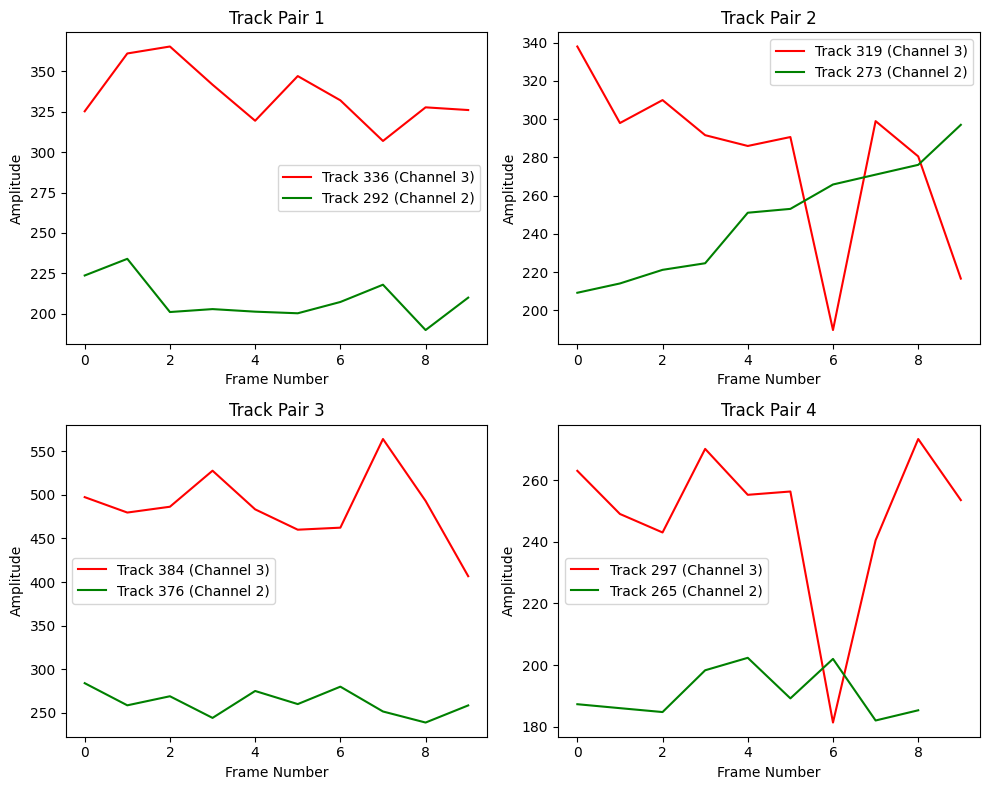

1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [32]:
track_pairs_1 = ((336,292), (319,273), (384,376), (297,265))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

i = 0 

axes = axes.flatten()

for c3_track_id, c2_track_id in track_pairs_1: 
        
    c3_subset = c3_filtered_df[c3_filtered_df['track_id'] == c3_track_id]
    c2_subset = c2_filtered_df[c2_filtered_df['track_id'] == c2_track_id]
    
    #print(c3_subset.shape)
    # Plotting lines for channel 3
    axes[i].plot(c3_subset['frame'], c3_subset['amplitude'], label=f'Track {c3_track_id} (Channel 3)', 
                 color = 'red')

    # Plotting lines for channel 2
    axes[i].plot(c2_subset['frame'], c2_subset['amplitude'], label=f'Track {c2_track_id} (Channel 2)', 
                 color = 'green')
    
    # Set labels and title for each subplot
    axes[i].set_title(f'Track Pair {i+1}')
    axes[i].set_xlabel('Frame Number')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()
    i = i + 1
    
    # Adjust layout for better spacing
    plt.tight_layout()

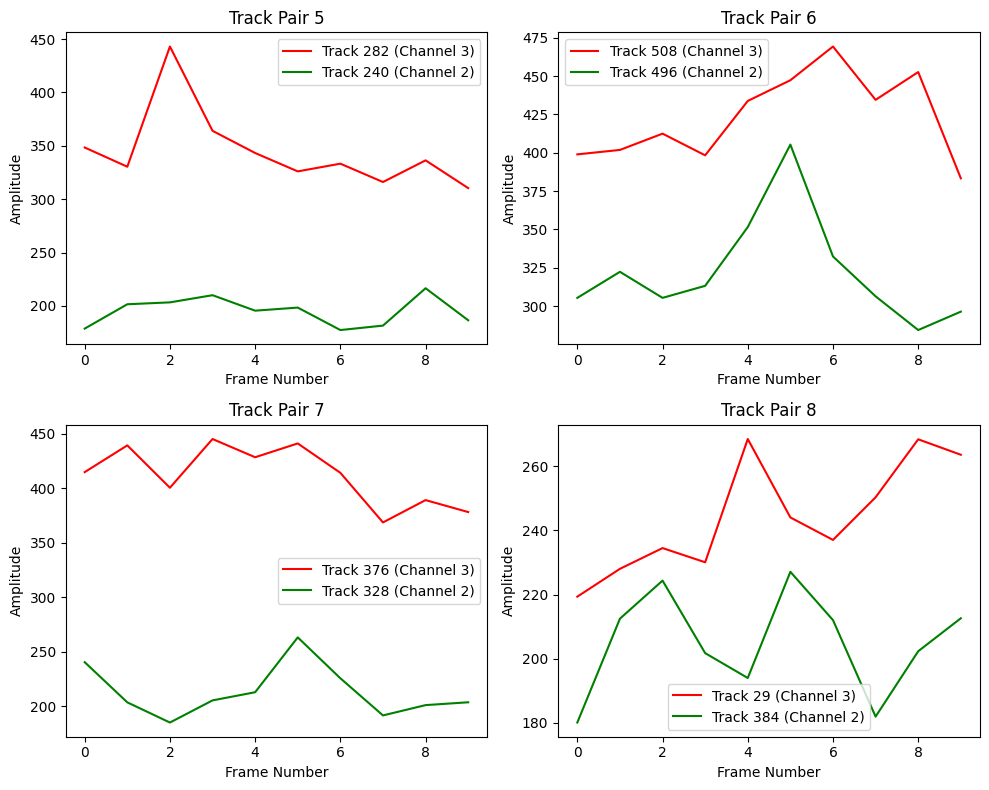

1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [16]:
track_pairs_2 = ((282,240), (508,496), (376,328), (29,384))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

i = 0 
j = 4

axes = axes.flatten()

for c3_track_id, c2_track_id in track_pairs_2: 
        
    c3_subset = c3_filtered_df[c3_filtered_df['track_id'] == c3_track_id]
    c2_subset = c2_filtered_df[c2_filtered_df['track_id'] == c2_track_id]
    
    #print(c3_subset.shape)
    # Plotting lines for channel 3
    axes[i].plot(c3_subset['frame'], c3_subset['amplitude'], label=f'Track {c3_track_id} (Channel 3)', 
                 color = 'red')

    # Plotting lines for channel 2
    axes[i].plot(c2_subset['frame'], c2_subset['amplitude'], label=f'Track {c2_track_id} (Channel 2)', 
                 color = 'green')
    
    # Set labels and title for each subplot
    axes[i].set_title(f'Track Pair {j+1}')
    axes[i].set_xlabel('Frame Number')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()
    i = i + 1
    j = j + 1
    
    # Adjust layout for better spacing
    plt.tight_layout()

In [ ]:
track_pairs_3 = ((551,547), (250,659), (105,544), (225,20))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

i = 0 
j = 8

axes = axes.flatten()

for c3_track_id, c2_track_id in track_pairs_3: 
        
    c3_subset = c3_filtered_df[c3_filtered_df['track_id'] == c3_track_id]
    c2_subset = c2_filtered_df[c2_filtered_df['track_id'] == c2_track_id]
    
    #print(c3_subset.shape)
    # Plotting lines for channel 3
    axes[i].plot(c3_subset['frame'], c3_subset['amplitude'], label=f'Track {c3_track_id} (Channel 3)', 
                 color = 'red')

    # Plotting lines for channel 2
    axes[i].plot(c2_subset['frame'], c2_subset['amplitude'], label=f'Track {c2_track_id} (Channel 2)', 
                 color = 'green')
    
    # Set labels and title for each subplot
    axes[i].set_title(f'Track Pair {j+1}')
    axes[i].set_xlabel('Frame Number')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()
    i = i + 1
    j = j + 1
    
    # Adjust layout for better spacing
    plt.tight_layout()

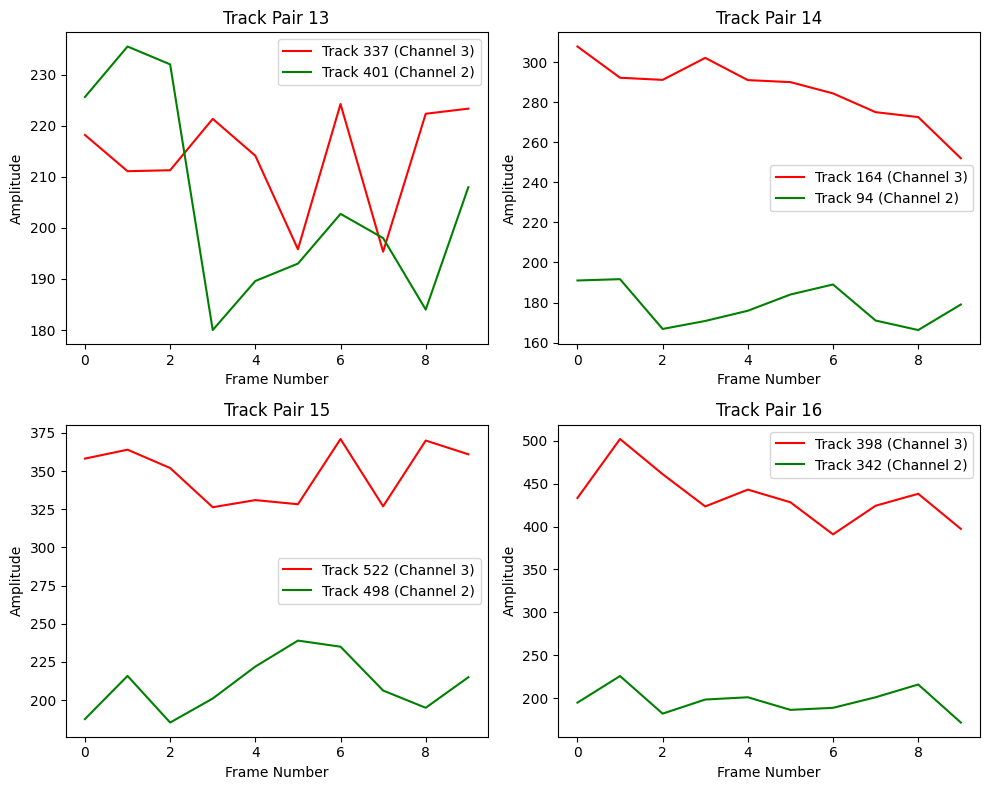

1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [15]:
track_pairs_4 = ((337,401), (164,94), (522,498), (398,342))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

i = 0 
j = 12

axes = axes.flatten()

for c3_track_id, c2_track_id in track_pairs_4: 
        
    c3_subset = c3_filtered_df[c3_filtered_df['track_id'] == c3_track_id]
    c2_subset = c2_filtered_df[c2_filtered_df['track_id'] == c2_track_id]
    
    #print(c3_subset.shape)
    # Plotting lines for channel 3
    axes[i].plot(c3_subset['frame'], c3_subset['amplitude'], label=f'Track {c3_track_id} (Channel 3)', 
                 color = 'red')

    # Plotting lines for channel 2
    axes[i].plot(c2_subset['frame'], c2_subset['amplitude'], label=f'Track {c2_track_id} (Channel 2)', 
                 color = 'green')
    
    # Set labels and title for each subplot
    axes[i].set_title(f'Track Pair {j+1}')
    axes[i].set_xlabel('Frame Number')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()
    i = i + 1
    j = j + 1
    
    # Adjust layout for better spacing
    plt.tight_layout()

In [17]:
c3_track_df.head()

,level_0,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,tree_id,track_id
0,0,0,0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0,0,0
1,1,0,1,198.333333,69.0,52.0,-2.0,2.0,2.0,7.0,0,1,1
2,2,0,2,207.348417,103.0,123.0,4.0,3.0,2.0,36.0,0,2,2
3,3,0,3,185.333333,104.0,244.0,-2.0,4.0,2.0,7.0,0,3,3
4,4,0,4,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0,4,4


In [23]:
df_sorted = c3_track_df.sort_values(by='sigma_z', ascending = False)[0:20]
df_sorted

,level_0,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,tree_id,track_id
1147,1147,2,0,205.665552,25.0,146.0,4.0,2.0,2.0,7752.0,2,750,750
3114,3114,5,278,197.210797,126.0,179.0,43.0,2.0,3.0,52.0,5,1344,1344
3958,3958,7,8,210.567432,100.0,122.0,-4.0,2.0,2.0,46.0,7,1452,1452
1728,1728,3,7,211.497068,144.0,165.0,4.0,1.0,1.0,43.0,3,32,32
1148,1148,2,1,220.000000,41.0,140.0,-4.0,2.0,2.0,38.0,2,5,5
2,2,0,2,207.348417,103.0,123.0,4.0,3.0,2.0,36.0,0,2,2
3947,3947,6,545,203.490880,222.0,128.0,78.0,7.0,3.0,33.0,6,1603,1603
4630,4630,8,127,306.738708,125.0,193.0,9.0,3.0,1.0,23.0,8,150,150
1523,1523,2,376,226.580588,205.0,236.0,46.0,2.0,2.0,22.0,2,862,862
594,594,1,8,359.333333,144.0,152.0,-4.0,1.0,2.0,22.0,1,591,591


In [29]:
points_layer = viewer.add_points(df_sorted[["frame", "mu_z", "mu_y", "mu_x"]], size=3,
                                name = 'high std dev points', face_color = 'yellow', symbol = 'ring')

In [30]:
df_sorted_amp = c3_track_df.sort_values(by='amplitude', ascending = False)[0:20]
df_sorted_amp

,level_0,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,tree_id,track_id
4334,4334,7,384,564.000000,202.0,229.0,56.0,1.0,1.0,2.0,7,384,384
1031,1031,1,445,558.000000,223.0,95.0,60.0,1.0,1.0,2.0,1,433,433
1114,1114,1,528,539.472079,136.0,152.0,72.0,2.0,2.0,2.0,1,552,552
3923,3923,6,521,528.000000,198.0,182.0,76.0,2.0,1.0,5.0,6,1591,1591
2141,2141,3,420,527.666667,203.0,230.0,57.0,1.0,1.0,2.0,3,384,384
323,323,0,323,512.000000,111.0,199.0,44.0,1.0,1.0,2.0,0,323,323
2244,2244,3,523,505.000000,137.0,151.0,71.0,2.0,2.0,2.0,3,915,915
981,981,1,395,502.109714,105.0,229.0,54.0,1.0,1.0,2.0,1,398,398
552,552,0,552,500.266833,136.0,153.0,75.0,2.0,2.0,5.0,0,552,552
2022,2022,3,301,497.666667,83.0,75.0,43.0,0.0,1.0,1.0,3,321,321


1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [31]:
points_layer = viewer.add_points(df_sorted_amp[["frame", "mu_z", "mu_y", "mu_x"]], size=3,
                                name = 'high amp points', face_color = 'red', symbol = 'ring')

1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff80b79d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80b766638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff806a0c74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff806d1f04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff806d1ef71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff801b8b7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff801b8ca44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff801b997b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff801b993f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      